In [ ]:
import yaml
import pandas as pd
import numpy as np
import re

# exp_name = "GNNv3_v14_tuner_config_Criteo_distill"
# exp_name = "GNNv3_v17_tuner_config_Criteo"
# exp_name = "GNNv3_v19_tuner_config_Criteo"
exp_name = "FinalNet_tuner_config_Criteo"

# exp_name = "GNNv3_v14_tuner_config_Avazu"
# exp_name = "GNNv3_v14_tuner_config_Avazu3"
# exp_name = "GNNv3_v14_tuner_config_iPinYou_heavy"
# exp_name = "GNNv3_v14_tuner_config_iPinYou3"
# exp_name = "GNNv3_v14_tuner_config_iPinYou"
# exp_name = "GNNv3_v8_tuner_confi2g_iPinYou"
df_path = exp_name+".csv"
config_path = f"config/{exp_name}/model_config.yaml"

In [2]:
exp_df = pd.read_csv(df_path, names=["timestamp", "command", "exp_id", "dataset_id", "train", "val", "test"])
exp_df = exp_df[["exp_id", "test"]]
exp_df["exp_id"] = exp_df["exp_id"].apply(lambda x: str(x.split("[exp_id]")[1]).strip())
exp_df["test"] = exp_df["test"].apply(lambda x: x.split("[test]")[1])
exp_df["test"] = exp_df["test"].apply(lambda x: [eval(item) for item in re.findall(r"\d+\.\d+|\d+", x)])
exp_df[['logloss', 'AUC']] = pd.DataFrame(exp_df['test'].to_list(), index=exp_df.index)
del exp_df["test"]
exp_df

,exp_id,logloss,AUC
0,GNNv3_v20_Criteo_018_8211b886,0.438680,0.813502
1,GNNv3_v20_Criteo_048_a7bed2d1,0.437488,0.814551
2,GNNv3_v20_Criteo_034_f30af761,0.437479,0.814529
3,GNNv3_v20_Criteo_035_bef15c30,0.437302,0.814695
4,GNNv3_v20_Criteo_016_40aa8f09,0.438185,0.813874
5,GNNv3_v20_Criteo_042_9691b8ed,0.437722,0.814308
6,GNNv3_v20_Criteo_010_112a37de,0.438205,0.813929
7,GNNv3_v20_Criteo_031_4f571c20,0.437234,0.814737
8,GNNv3_v20_Criteo_002_af068edc,0.438969,0.813213
9,GNNv3_v20_Criteo_007_c57770fb,0.438344,0.813776


In [3]:
with open(config_path) as f:
    config_lst = yaml.load(f, Loader=yaml.FullLoader)
hyperparam_keys = list(list(config_lst.values())[0].keys())
total_exp_len = len(config_lst)
hyperparam_keys

['alpha',
 'batch_norm',
 'batch_size',
 'dataset_id',
 'debug_mode',
 'distill_loss',
 'early_stop_patience',
 'embedding_dim',
 'embedding_regularizer',
 'epochs',
 'eval_steps',
 'feature_config',
 'feature_specs',
 'group_id',
 'layer_norm',
 'learning_rate',
 'loss',
 'metrics',
 'model',
 'model_root',
 'monitor',
 'monitor_mode',
 'net_dropout',
 'net_regularizer',
 'num_hops',
 'num_mask',
 'num_tower',
 'num_workers',
 'optimizer',
 'pickle_feature_encoder',
 'pooling_method',
 'save_best_only',
 'seed',
 'shuffle',
 'task',
 'use_bilinear_fusion',
 'use_features',
 'verbose']

In [4]:
config_df = pd.DataFrame(config_lst).T
config_df["exp_id"] = config_df.index
config_df["exp_id"] = config_df["exp_id"].apply(lambda x : str(x).strip())
config_df

,alpha,batch_norm,batch_size,dataset_id,debug_mode,distill_loss,early_stop_patience,embedding_dim,embedding_regularizer,epochs,...,pickle_feature_encoder,pooling_method,save_best_only,seed,shuffle,task,use_bilinear_fusion,use_features,verbose,exp_id
GNNv3_v20_Criteo_001_40741760,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,16,0.00001,100,...,True,attn,True,2024,True,binary_classification,True,None,1,GNNv3_v20_Criteo_001_40741760
GNNv3_v20_Criteo_002_af068edc,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,False,2,16,0.00001,100,...,True,attn,True,2024,True,binary_classification,True,None,1,GNNv3_v20_Criteo_002_af068edc
GNNv3_v20_Criteo_003_a20b0fe7,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,16,0.00001,100,...,True,attn,True,2024,True,binary_classification,True,None,1,GNNv3_v20_Criteo_003_a20b0fe7
GNNv3_v20_Criteo_004_c5681e7f,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,False,2,16,0.00001,100,...,True,attn,True,2024,True,binary_classification,True,None,1,GNNv3_v20_Criteo_004_c5681e7f
GNNv3_v20_Criteo_005_16461b4d,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,16,0.00001,100,...,True,attn,True,2024,True,binary_classification,True,None,1,GNNv3_v20_Criteo_005_16461b4d
GNNv3_v20_Criteo_006_1beb769d,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,False,2,16,0.00001,100,...,True,attn,True,2024,True,binary_classification,True,None,1,GNNv3_v20_Criteo_006_1beb769d
GNNv3_v20_Criteo_007_c57770fb,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,16,0.00001,100,...,True,attn,True,2024,True,binary_classification,True,None,1,GNNv3_v20_Criteo_007_c57770fb
GNNv3_v20_Criteo_008_0c7177b7,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,False,2,16,0.00001,100,...,True,attn,True,2024,True,binary_classification,True,None,1,GNNv3_v20_Criteo_008_0c7177b7
GNNv3_v20_Criteo_009_67704062,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,16,0.00001,100,...,True,attn,True,2024,True,binary_classification,True,None,1,GNNv3_v20_Criteo_009_67704062
GNNv3_v20_Criteo_010_112a37de,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,False,2,16,0.00001,100,...,True,attn,True,2024,True,binary_classification,True,None,1,GNNv3_v20_Criteo_010_112a37de


In [5]:
exp_df

,exp_id,logloss,AUC
0,GNNv3_v20_Criteo_018_8211b886,0.438680,0.813502
1,GNNv3_v20_Criteo_048_a7bed2d1,0.437488,0.814551
2,GNNv3_v20_Criteo_034_f30af761,0.437479,0.814529
3,GNNv3_v20_Criteo_035_bef15c30,0.437302,0.814695
4,GNNv3_v20_Criteo_016_40aa8f09,0.438185,0.813874
5,GNNv3_v20_Criteo_042_9691b8ed,0.437722,0.814308
6,GNNv3_v20_Criteo_010_112a37de,0.438205,0.813929
7,GNNv3_v20_Criteo_031_4f571c20,0.437234,0.814737
8,GNNv3_v20_Criteo_002_af068edc,0.438969,0.813213
9,GNNv3_v20_Criteo_007_c57770fb,0.438344,0.813776


In [6]:
df = pd.merge(exp_df, config_df, on="exp_id")
df

,exp_id,logloss,AUC,alpha,batch_norm,batch_size,dataset_id,debug_mode,distill_loss,early_stop_patience,...,optimizer,pickle_feature_encoder,pooling_method,save_best_only,seed,shuffle,task,use_bilinear_fusion,use_features,verbose
0,GNNv3_v20_Criteo_018_8211b886,0.438680,0.813502,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,False,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
1,GNNv3_v20_Criteo_048_a7bed2d1,0.437488,0.814551,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,False,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
2,GNNv3_v20_Criteo_034_f30af761,0.437479,0.814529,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,False,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
3,GNNv3_v20_Criteo_035_bef15c30,0.437302,0.814695,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
4,GNNv3_v20_Criteo_016_40aa8f09,0.438185,0.813874,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,False,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
5,GNNv3_v20_Criteo_042_9691b8ed,0.437722,0.814308,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,False,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
6,GNNv3_v20_Criteo_010_112a37de,0.438205,0.813929,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,False,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
7,GNNv3_v20_Criteo_031_4f571c20,0.437234,0.814737,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
8,GNNv3_v20_Criteo_002_af068edc,0.438969,0.813213,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,False,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
9,GNNv3_v20_Criteo_007_c57770fb,0.438344,0.813776,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1


In [7]:
df.head(5)

,exp_id,logloss,AUC,alpha,batch_norm,batch_size,dataset_id,debug_mode,distill_loss,early_stop_patience,...,optimizer,pickle_feature_encoder,pooling_method,save_best_only,seed,shuffle,task,use_bilinear_fusion,use_features,verbose
0,GNNv3_v20_Criteo_018_8211b886,0.438680,0.813502,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,False,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
1,GNNv3_v20_Criteo_048_a7bed2d1,0.437488,0.814551,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,False,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
2,GNNv3_v20_Criteo_034_f30af761,0.437479,0.814529,0.9,True,4096,Criteo_x4_10_h5_49cec1bd,False,False,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
3,GNNv3_v20_Criteo_035_bef15c30,0.437302,0.814695,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,True,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1
4,GNNv3_v20_Criteo_016_40aa8f09,0.438185,0.813874,0.7,True,4096,Criteo_x4_10_h5_49cec1bd,False,False,2,...,adam,True,attn,True,2024,True,binary_classification,True,None,1


In [8]:
mask = df.apply(lambda col: col.apply(lambda x: isinstance(x, (list, dict))).any())
cols_to_drop = mask[mask].index
df[cols_to_drop] = df[cols_to_drop].apply(lambda x: str(x))

/tmp/ipykernel_3735141/1749032602.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[cols_to_drop] = df[cols_to_drop].apply(lambda x: str(x))


In [9]:
mask = (df.nunique(axis=0) > 1)
multi_value_columns = mask[mask].index
hyper_df = df[multi_value_columns]
hyper_df

,exp_id,logloss,AUC,alpha,distill_loss,net_dropout,num_mask,num_tower
0,GNNv3_v20_Criteo_018_8211b886,0.438680,0.813502,0.9,False,0,3,6
1,GNNv3_v20_Criteo_048_a7bed2d1,0.437488,0.814551,0.7,False,0.1,4,6
2,GNNv3_v20_Criteo_034_f30af761,0.437479,0.814529,0.9,False,0.1,3,5
3,GNNv3_v20_Criteo_035_bef15c30,0.437302,0.814695,0.7,True,0.1,3,5
4,GNNv3_v20_Criteo_016_40aa8f09,0.438185,0.813874,0.7,False,0,4,5
5,GNNv3_v20_Criteo_042_9691b8ed,0.437722,0.814308,0.9,False,0.1,3,6
6,GNNv3_v20_Criteo_010_112a37de,0.438205,0.813929,0.9,False,0,3,5
7,GNNv3_v20_Criteo_031_4f571c20,0.437234,0.814737,0.7,True,0.1,4,4
8,GNNv3_v20_Criteo_002_af068edc,0.438969,0.813213,0.9,False,0,3,4
9,GNNv3_v20_Criteo_007_c57770fb,0.438344,0.813776,0.7,True,0,4,4


In [10]:
multi_value_columns = list(set(multi_value_columns) - set(["AUC", "logloss", "exp_id"]))
multi_value_columns

['distill_loss', 'num_mask', 'num_tower', 'net_dropout', 'alpha']

In [11]:
# hyper_df.groupby("num_tower")["AUC"].quantile([0.25, 0.75])

In [12]:
hyper_df

,exp_id,logloss,AUC,alpha,distill_loss,net_dropout,num_mask,num_tower
0,GNNv3_v20_Criteo_018_8211b886,0.438680,0.813502,0.9,False,0,3,6
1,GNNv3_v20_Criteo_048_a7bed2d1,0.437488,0.814551,0.7,False,0.1,4,6
2,GNNv3_v20_Criteo_034_f30af761,0.437479,0.814529,0.9,False,0.1,3,5
3,GNNv3_v20_Criteo_035_bef15c30,0.437302,0.814695,0.7,True,0.1,3,5
4,GNNv3_v20_Criteo_016_40aa8f09,0.438185,0.813874,0.7,False,0,4,5
5,GNNv3_v20_Criteo_042_9691b8ed,0.437722,0.814308,0.9,False,0.1,3,6
6,GNNv3_v20_Criteo_010_112a37de,0.438205,0.813929,0.9,False,0,3,5
7,GNNv3_v20_Criteo_031_4f571c20,0.437234,0.814737,0.7,True,0.1,4,4
8,GNNv3_v20_Criteo_002_af068edc,0.438969,0.813213,0.9,False,0,3,4
9,GNNv3_v20_Criteo_007_c57770fb,0.438344,0.813776,0.7,True,0,4,4


In [13]:
# try:
#     del hyper_df["exp_id"]
# except:
#     pass
# hyper_df

In [14]:
iqr = np.quantile(hyper_df["AUC"], q=0.75) - np.quantile(hyper_df["AUC"], q=0.25)
hyper_df = hyper_df[
    (hyper_df["AUC"] > np.quantile(hyper_df["AUC"], q=0.25) - iqr)
]
hyper_df

,exp_id,logloss,AUC,alpha,distill_loss,net_dropout,num_mask,num_tower
0,GNNv3_v20_Criteo_018_8211b886,0.438680,0.813502,0.9,False,0,3,6
1,GNNv3_v20_Criteo_048_a7bed2d1,0.437488,0.814551,0.7,False,0.1,4,6
2,GNNv3_v20_Criteo_034_f30af761,0.437479,0.814529,0.9,False,0.1,3,5
3,GNNv3_v20_Criteo_035_bef15c30,0.437302,0.814695,0.7,True,0.1,3,5
4,GNNv3_v20_Criteo_016_40aa8f09,0.438185,0.813874,0.7,False,0,4,5
5,GNNv3_v20_Criteo_042_9691b8ed,0.437722,0.814308,0.9,False,0.1,3,6
6,GNNv3_v20_Criteo_010_112a37de,0.438205,0.813929,0.9,False,0,3,5
7,GNNv3_v20_Criteo_031_4f571c20,0.437234,0.814737,0.7,True,0.1,4,4
8,GNNv3_v20_Criteo_002_af068edc,0.438969,0.813213,0.9,False,0,3,4
9,GNNv3_v20_Criteo_007_c57770fb,0.438344,0.813776,0.7,True,0,4,4


In [15]:
# hyper_df = hyper_df[hyper_df["embedding_dim"] == 32]

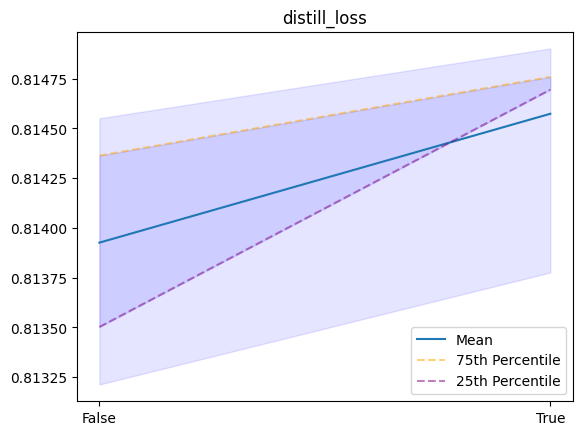

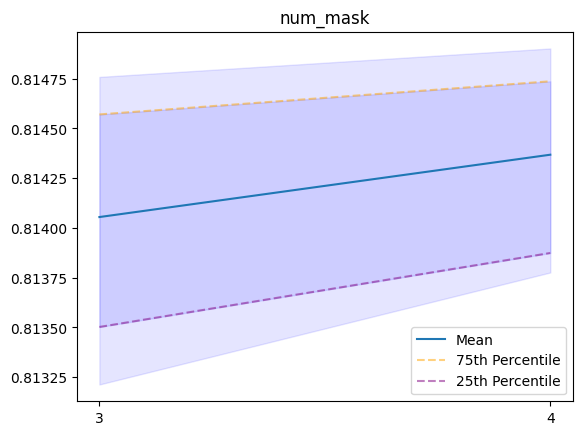

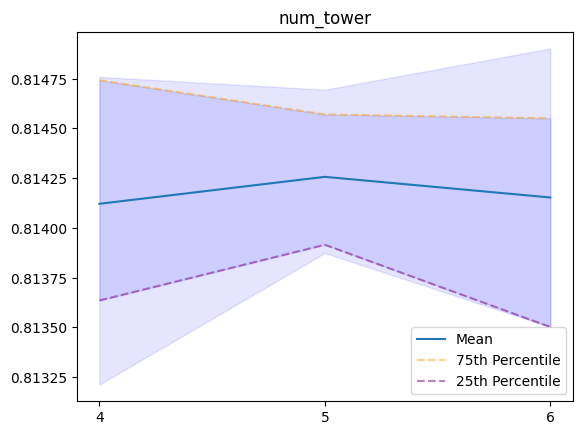

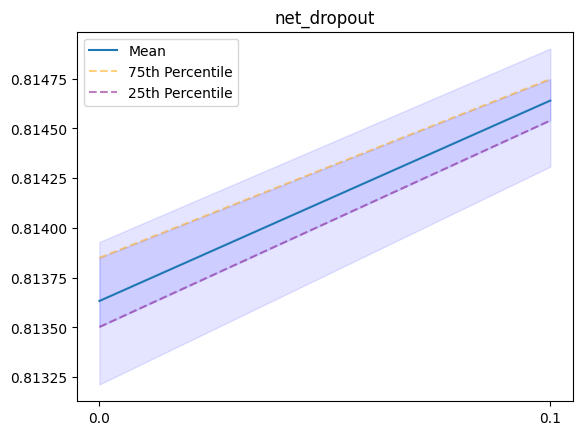

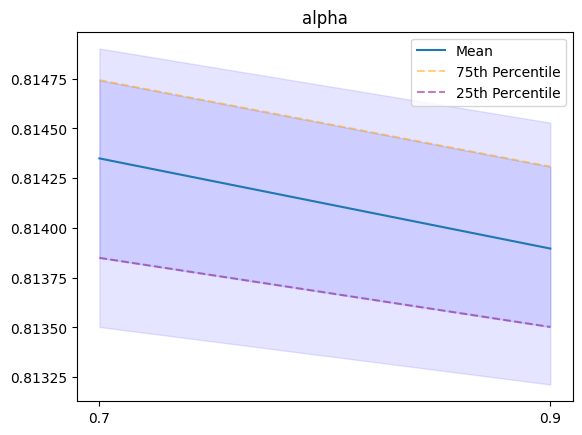

In [16]:
import matplotlib.pyplot as plt
import numpy as np

for col in multi_value_columns:
    x_label = hyper_df.groupby(col).max("AUC").index.values
    x = np.arange(len(x_label))
    
    quantile = hyper_df.groupby(col)["AUC"].quantile([0.25, 0.75]).values.reshape(-1, 2)
    top_quantile = quantile[:, 1]
    bot_quantile = quantile[:, 0]
    
    max_auc = hyper_df.groupby(col).max("AUC").values[:, 1]
    mean_auc = hyper_df.groupby(col).mean("AUC").values[:, 1]
    min_auc = hyper_df.groupby(col).min("AUC").values[:, 1]
    
    plt.plot(x, mean_auc, label="Mean")
    plt.fill_between(x, min_auc, max_auc, color="blue", alpha=0.1)
    plt.fill_between(x, bot_quantile, top_quantile, color="blue", alpha=0.1)
    
    # plt.plot(x, max_auc, color="red", linestyle="--", alpha=0.5, label="Max")  # Dotted line for max values
    # plt.plot(x, min_auc, color="green", linestyle="--", alpha=0.5, label="Min")  # Dotted line for min values
    plt.plot(x, top_quantile, color="orange", linestyle="--", alpha=0.5, label="75th Percentile")  # Dotted line for 75th percentile
    plt.plot(x, bot_quantile, color="purple", linestyle="--", alpha=0.5, label="25th Percentile")  # Dotted line for 25th percentile
    
    plt.xticks(ticks=x, labels=x_label)
    plt.title(col)
    plt.legend()
    plt.show()

In [17]:
hyper_df.sort_values("AUC", ascending=False).head(50)

,exp_id,logloss,AUC,alpha,distill_loss,net_dropout,num_mask,num_tower
11,GNNv3_v20_Criteo_047_8d2fbce4,0.437127,0.814902,0.7,True,0.1,4,6
12,GNNv3_v20_Criteo_027_3df7d3ea,0.437258,0.814759,0.7,True,0.1,3,4
7,GNNv3_v20_Criteo_031_4f571c20,0.437234,0.814737,0.7,True,0.1,4,4
3,GNNv3_v20_Criteo_035_bef15c30,0.437302,0.814695,0.7,True,0.1,3,5
1,GNNv3_v20_Criteo_048_a7bed2d1,0.437488,0.814551,0.7,False,0.1,4,6
2,GNNv3_v20_Criteo_034_f30af761,0.437479,0.814529,0.9,False,0.1,3,5
5,GNNv3_v20_Criteo_042_9691b8ed,0.437722,0.814308,0.9,False,0.1,3,6
6,GNNv3_v20_Criteo_010_112a37de,0.438205,0.813929,0.9,False,0,3,5
4,GNNv3_v20_Criteo_016_40aa8f09,0.438185,0.813874,0.7,False,0,4,5
9,GNNv3_v20_Criteo_007_c57770fb,0.438344,0.813776,0.7,True,0,4,4


In [18]:
hyper_df[(hyper_df["embedding_dim"] == 32) & hyper_df["use_feature_gating"] == True].sort_values("AUC", ascending=False).head(5)

KeyError: 'embedding_dim'

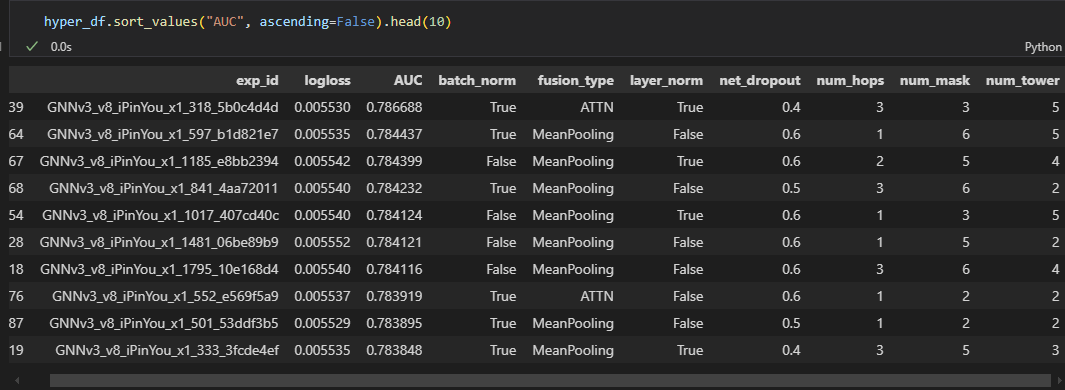

https://optuna.readthedocs.io/en/stable/reference/samplers/index.html

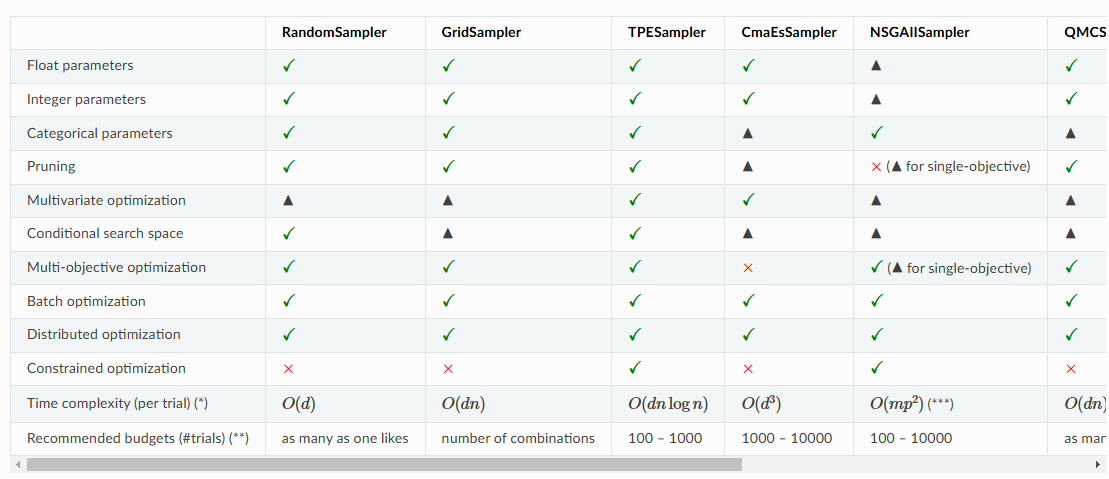

In [ ]:
for col in multi_value_columns:
    hyperparam_cnt_lst = np.array(hyper_df.groupby(col).count()["exp_id"].tolist())
    norm_lst = list(hyperparam_cnt_lst/total_exp_len)
    print(col)
    print(list(hyper_df.groupby(col).count().index))
    print([eval("{:.1f}".format(item*100)) for item in norm_lst])

block2_dropout
[0.3, 0.4]
[16.7, 8.3]
block1_dropout
[0.2, 0.3, 0.4]
[8.3, 8.3, 8.3]
use_feature_gating
[False, True]
[12.5, 12.5]
embedding_dim
[16, 32]
[12.5, 12.5]
